In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dataset = fetch_california_housing(as_frame=True)
df = dataset.frame

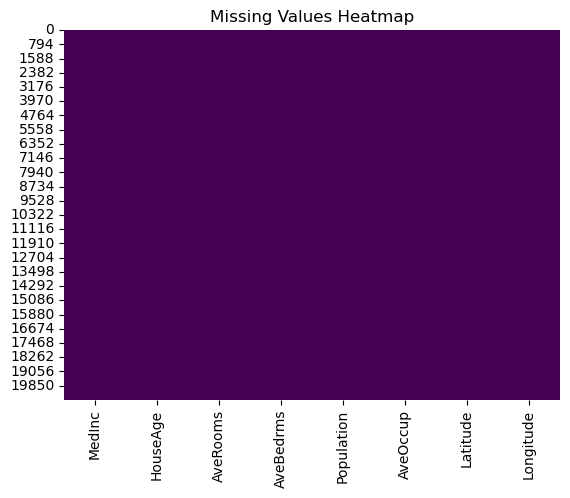

In [59]:
# Heatmap to visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
print ('5 rows of the dataset')
print(df.head(5))

5 rows of the dataset
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values:\n", missing_percent)


Percentage of Missing Values:
 MedInc         0.0
HouseAge       0.0
AveRooms       0.0
AveBedrms      0.0
Population     0.0
AveOccup       0.0
Latitude       0.0
Longitude      0.0
MedHouseVal    0.0
dtype: float64


In [27]:
#  Mean Imputation
median_imputed_df = df.copy()
median_imputed_df['MedInc'] = median_imputed_df['MedInc'].fillna(median_imputed_df['MedInc'].median())
median_imputed_df['HouseAge'] = median_imputed_df['HouseAge'].fillna(median_imputed_df['HouseAge'].median())
median_imputed_df['AveRooms'] = median_imputed_df['AveRooms'].fillna(median_imputed_df['AveRooms'].median())


In [29]:
# Row Removal
row_removed_df = df.copy()
row_removed_df = row_removed_df.dropna()

In [31]:
# Comparing the data after handling missing values
print("\nMean Imputation: Missing Values Remaining\n", mean_imputed_df.isnull().sum())
print("\nMedian Imputation: Missing Values Remaining\n", median_imputed_df.isnull().sum())
print("\nRow Removal: Dataset Shape\n", row_removed_df.shape)


Mean Imputation: Missing Values Remaining
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Median Imputation: Missing Values Remaining
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Row Removal: Dataset Shape
 (20640, 9)


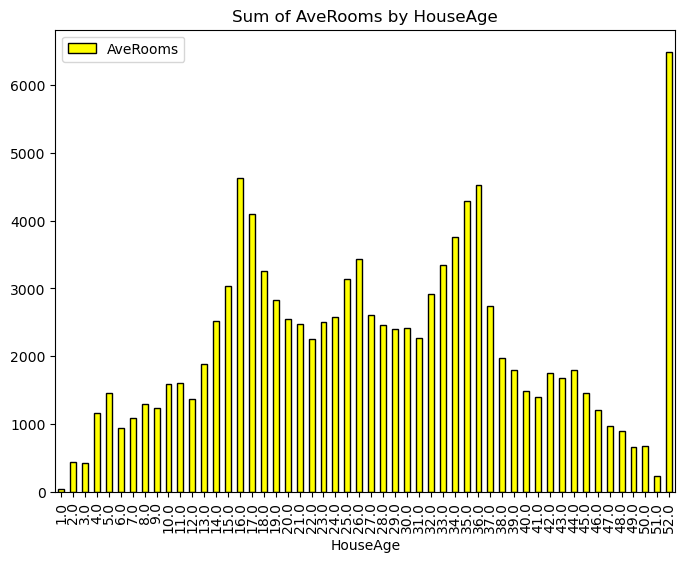

In [45]:
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['Target'] = dataset.target
pivot_bar2 = df.pivot_table(values="AveRooms", index="HouseAge", aggfunc="sum")
pivot_bar2.plot(kind="bar", color=["yellow", "green"], edgecolor="black", figsize=(8, 6))
plt.title("Sum of AveRooms by HouseAge")
plt.show()



In [61]:
# Randomly introduce missing values in selected columns
np.random.seed(42)
df.loc[np.random.choice(df.index, size=100, replace=False), 'MedInc'] = np.nan
df.loc[np.random.choice(df.index, size=50, replace=False), 'HouseAge'] = np.nan
df.loc[np.random.choice(df.index, size=75, replace=False), 'AveRooms'] = np.nan

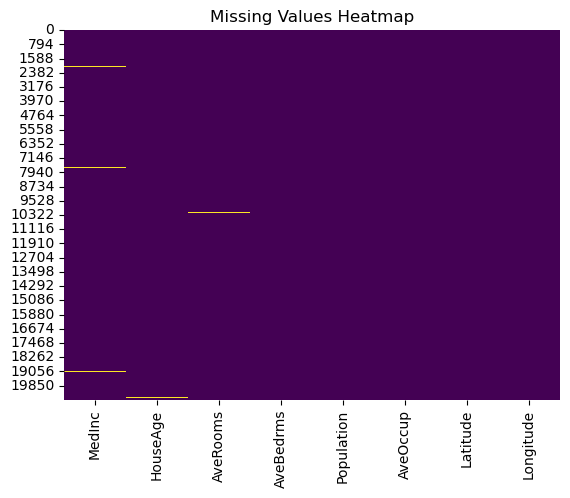

In [63]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [65]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values:\n", missing_percent)


Percentage of Missing Values:
 MedInc        0.484496
HouseAge      0.242248
AveRooms      0.363372
AveBedrms     0.000000
Population    0.000000
AveOccup      0.000000
Latitude      0.000000
Longitude     0.000000
dtype: float64
